# App Store 数据分析
## 简介

本次分析的数据集是 [Mobile App Store (7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)，取自 IOS app 商店的数据信息。其中包含了以下数据特征：

**appleStore.csv**

- `id`: App ID
- `track_name`: App 名称
- `size_bytes`: 大小 (以 Bytes 为单位)
- `currency`: 价格货币单位
- `price`: APP 价格
- `rating_count_tot`: 用户评分数量 (所有版本的总计)
- `rating_count_ver`: 用户评分数量 (当前版本)
- `user_rating`: 用户平均评分 (所有版本)
- `user_rating_ver`: 用户平均评分 (当前版本)
- `ver`: 最新版本号
- `cont_rating`: 内容评级
- `prime_genre`: 主要类型
- `sup_devices.num`: 支持设备数量
- `ipadSc_urls.num`: 展示截图的数量
- `lang.num`: 支持语言的数量
- `vpp_lic`: Vpp Device Based Licensing Enabled

**appleStore_description.csv**

- `id`: App ID
- `track_name`: App 名称
- `size_bytes`: 大小 (以 Bytes 为单位)
- `app_desc`: APP 描述文字

导入数据进行初步了解：

In [1]:
# 导入常用库
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
# 读取数据集
df_desc = pd.read_csv('appleStore_description.csv')
df_app = pd.read_csv('AppleStore.csv')

In [3]:
df_desc.head(3)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...


In [4]:
df_app.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [5]:
df_desc.sample(5)

,id,track_name,size_bytes,app_desc
4129,1024374740,Dirt Racing Mobile 3D,233611264,* FREE DEMO AVAILABLE - Dirt Racing Mobile 3D ...
161,320029256,Whole Foods Market,137312256,"Make your life simpler, healthier and more del..."
670,413511993,Weather Radio by WDT,22879232,Weather Radio enables you to receive critical ...
4120,1023681711,Dr. Panda Firefighters,230628352,FIGHT FIRES AND SAVE THE DAY!\nWork together w...
3208,943869618,Toca Kitchen 2,112056320,The wildly popular Toca Kitchen is back! With ...


### 提出想要探索的问题：

- 这些 APP 的价格分布如何，免费应用所占比例是多少？
- 总评分与价格有没有相关性？
- 游戏类与非游戏类 APP 的收费情况？
- 游戏类与非游戏类 APP 的评分分布差异？


## 数据整理
### 数据评估

In [6]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
id            7197 non-null int64
track_name    7197 non-null object
size_bytes    7197 non-null int64
app_desc      7197 non-null object
dtypes: int64(2), object(2)
memory usage: 225.0+ KB


In [7]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [8]:
df_desc.id.duplicated().sum()

0

In [9]:
df_app.id.duplicated().sum()

0

In [10]:
df_app.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [11]:
df_app['price'].value_counts() # 可以进行 cut 分段

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: price, dtype: int64

In [12]:
df_app['user_rating'].value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

In [13]:
df_app['user_rating_ver'].value_counts()

4.5    2205
0.0    1443
4.0    1237
5.0     964
3.5     533
3.0     304
2.5     176
2.0     136
1.0     125
1.5      74
Name: user_rating_ver, dtype: int64

In [14]:
df_app.shape

(7197, 17)

In [15]:
df_app['prime_genre'].value_counts()/df_app.shape[0]

Games                0.536612
Entertainment        0.074337
Education            0.062943
Photo & Video        0.048492
Utilities            0.034459
Health & Fitness     0.025010
Productivity         0.024733
Social Networking    0.023204
Lifestyle            0.020008
Music                0.019175
Shopping             0.016952
Sports               0.015840
Book                 0.015562
Finance              0.014450
Travel               0.011255
News                 0.010421
Weather              0.010004
Reference            0.008893
Food & Drink         0.008754
Business             0.007920
Navigation           0.006392
Medical              0.003196
Catalogs             0.001389
Name: prime_genre, dtype: float64

In [16]:
df_app.cont_rating.unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

### 数据清洗

针对最开始提出的问题，以及对数据的更详细的评估我们可以对数据进行以下处理：

- 将 `df_desc` 中的 `app_desc` 列合并到 `df_app` 中
- 删除不需要的数据列（`Unnamed: 0`,`currency`,`vpp_lic`）
- 将列名中的 `.` 修改为 `_`
- `id` 列修改为字符串类型
- 对 `prize` 进行 `cut` 分段，创建新的分类变量 `price_cut`

In [17]:
df = pd.merge(df_app,df_desc[['id','app_desc']],on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 18 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
app_desc            7197 non-null object
dtypes: float64(3), int64(9), object(6)
memory usage: 1.0+ MB


In [18]:
df.drop(['Unnamed: 0','currency','vpp_lic'],axis=1,inplace=True)
df = df.rename(columns={c: c.replace('.', '_') for c in df_app.columns})
df.columns

Index(['id', 'track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices_num', 'ipadSc_urls_num',
       'lang_num', 'app_desc'],
      dtype='object')

In [19]:
df.id = df.id.astype('str')
df.id.dtype

dtype('O')

In [20]:
price_labels = ['Free','USD:0~5','USD:5~20','USD:20+']
df['price_cut'] = pd.cut(df['price'],bins=[-1,0,5,20,300],labels=price_labels)

In [21]:
df['price_cut'].value_counts()

Free        4056
USD:0~5     2703
USD:5~20     402
USD:20+       36
Name: price_cut, dtype: int64

In [22]:
df['is_Game'] = df['prime_genre'] == 'Games'
df['is_Game'].replace([True,False],['Games','NotGames'],inplace=True)

In [23]:
df['is_Game'].value_counts()

Games       3862
NotGames    3335
Name: is_Game, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 17 columns):
id                  7197 non-null object
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices_num     7197 non-null int64
ipadSc_urls_num     7197 non-null int64
lang_num            7197 non-null int64
app_desc            7197 non-null object
price_cut           7197 non-null category
is_Game             7197 non-null object
dtypes: category(1), float64(3), int64(6), object(7)
memory usage: 963.1+ KB


In [25]:
df.head(3)

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,app_desc,price_cut,is_Game
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,"SAVE 20%, now only $3.99 for a limited time!\n...",USD:0~5,Games
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,Let Evernote change the way you organize your ...,Free,NotGames
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,Download the most popular free weather app pow...,Free,NotGames


在数据清洗后，获得了一份整洁的数据集，可以用来探索最开始提出的问题：

## 探索数据
### APP 的价格分布如何，免费应用所占比例是多少？

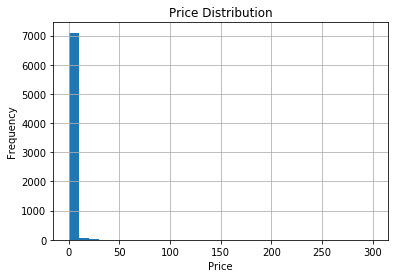

In [26]:
df['price'].hist(bins=30,figsize=(6,4))
plt.title('Price Distribution')
plt.ylabel('Frequency')
plt.xlabel('Price');

可以看出 price 是非常偏斜的分布，大部分都在0-20的范围内。

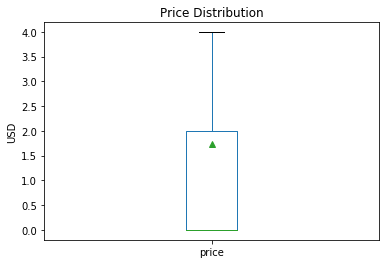

In [27]:
# showfliers=False 不显示离群值
df['price'].plot.box(showfliers=False,showmeans=True,figsize=(6,4))
plt.title('Price Distribution')
plt.ylabel('USD');

使用箱线图将离群值隐藏之后，可以发现大部分的价格都在 5 美元以下。

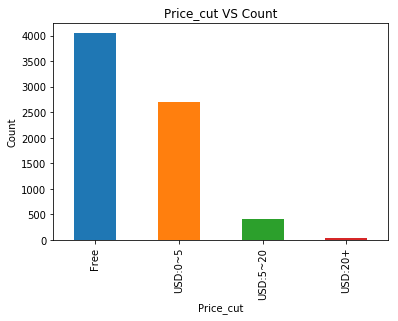

In [28]:
df.price_cut.value_counts().plot.bar(figsize=(6,4))
plt.title('Price_cut VS Count')
plt.ylabel('Count')
plt.xlabel('Price_cut');

图中可以明确看到分类变量各个类别的数量对比，在价格段 `price_cut` 这列数据中，占据绝大多数的类别是免费和5元以下。

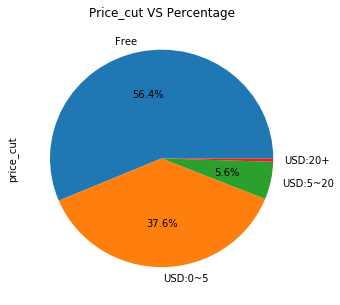

In [29]:
# df.price_cut.value_counts().plot.pie(autopct='%.1f%%',figsize=(5,5))
# plt.title('Price_cut VS Percentage');
## 使最小的扇形不显示百分比的做法：
df.price_cut.value_counts().plot.pie(autopct=lambda pct:'' if pct< 1 else "{:.1f}%".format(pct),figsize=(5,5))
plt.title('Price_cut VS Percentage');

饼图中可以明确看出，免费应用占比为 56.4%，占据一半以上。

### 总评分与价格有没有相关性？

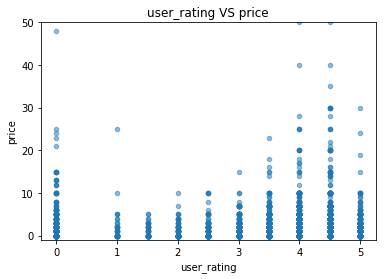

In [30]:
df.plot.scatter(x='user_rating',y='price',alpha=0.5)
plt.title('user_rating VS price')
plt.ylim(-1,50);

`price` 的分布存在一些极端值，所以使用 `ylim` 做了限制。因为 `user_rating` 实际上是离散数值，所以出现了一条一条的散点分布情况。
图中没有办法观察出明显的相关趋势。

我们使用 corr 计算一下相关系数：

In [31]:
df['price'].corr(df['user_rating'])

0.046601003621424955

可以看到确实相关系数很小，小于0.05。使用 `df.corr()` 可以看到所有数值变量之间的相关系数，可以观察一下有没有较大的相关系数：

In [32]:
df.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num
size_bytes,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614
price,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287
user_rating,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976
user_rating_ver,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580
sup_devices_num,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681
ipadSc_urls_num,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378
lang_num,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000


可以看到这些数值变量之间，只有 `user_rating` 和 `user_rating_ver` 之间的相关系数比较大，其他都没有超过 0.5 的情况。其他变量之间的线性相关性不大，我们使用其他可视化探索一下有没有其他数据规律。

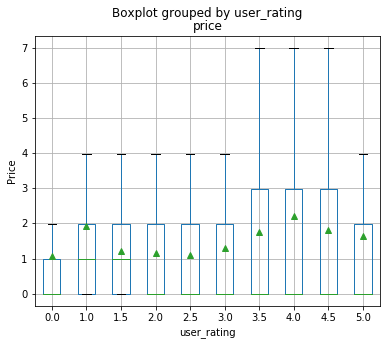

In [33]:
df.boxplot(column=['price'], by='user_rating',
           showfliers=False, showmeans=True, figsize=(6,5))
plt.ylabel('Price');

可以看到大部分评分的中位数都是免费的 0，说明免费应用占据了很大部分，不容易观察出收费应用的情况，所以筛选出收费应用来再探索一下：

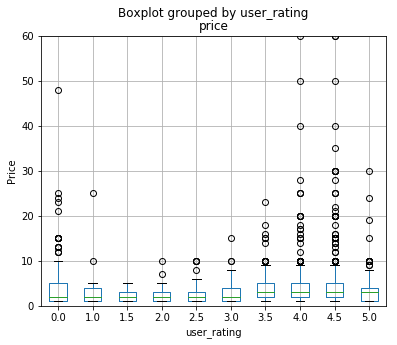

In [34]:
df[df['price']>0].boxplot(column=['price'],
                          by='user_rating',figsize=(6,5))
plt.ylim(0,60)
plt.ylabel('Price');

可以从图中看到，价格较高的一些离群值出现在 3.5 分以上的评分中比较多，0 分的情况下，也比 1-3 分的情况下要多。看箱线区域，0 分也与 3.5-4.5 的评分分布类似。这个现象比较有趣，猜测可能如果是价格较高的 APP，如果让用户失望，可能会更倾向于评 0 分，而不是一些中间的分数。

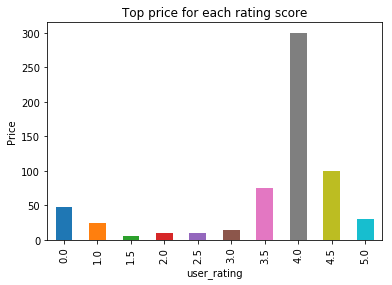

In [35]:
df.groupby('user_rating')['price'].max().plot.bar()
plt.title('Top price for each rating score')
plt.ylabel('Price');

每个评分的最大值探索，可以看到，最高价格的几个APP都分布在0分以及3.5分以上。与箱线图的结论相似。
### 探索游戏应用与价格的关系

In [36]:
df.groupby(['price_cut','is_Game']).size().unstack()

is_Game,Games,NotGames
price_cut,,
Free,2257,1799
USD:0~5,1372,1331
USD:5~20,230,172
USD:20+,3,33


这样可以将长格式的数据转换为宽格式，用来制作组合状图对比：

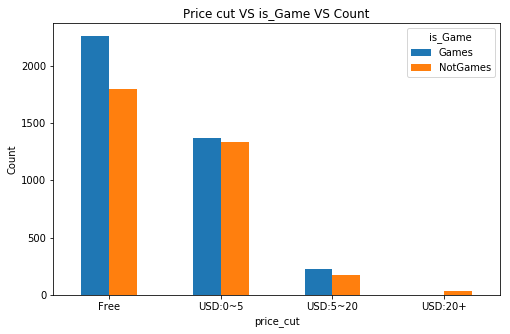

In [37]:
df.groupby(['price_cut','is_Game']).size().unstack().plot.bar(figsize=(8,5))
plt.title('Price cut VS is_Game VS Count')
plt.xticks(rotation=0) # 控制 x 轴刻度文字的角度
plt.ylabel('Count');

从图中可以看出，免费应用中游戏应用比例较高，非免费应用的分布较为接近。

### 探索游戏应用与评分的关系

In [38]:
df.groupby(['user_rating','is_Game']).size().unstack()

is_Game,Games,NotGames
user_rating,,
0.0,462,467
1.0,15,29
1.5,10,46
2.0,29,77
2.5,44,152
3.0,133,250
3.5,301,401
4.0,927,699
4.5,1664,999


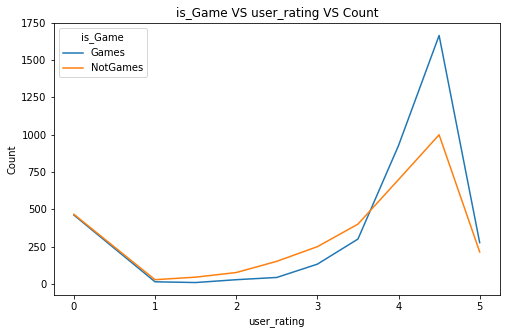

In [39]:
df.groupby(['user_rating','is_Game']).size().unstack().plot(figsize=(8,5))
plt.title('is_Game VS user_rating VS Count')
plt.ylabel('Count');

图中可以看出，在3.5分之前，都是非游戏应用较多，3.5分之后则是游戏应用较多。

## 总结

- 所有 APP 中，大部分都小于 5 美元。免费应用占比为 56.4%，占据一半以上。
- 经过散点图探索和相关系数的计算，可以看到价格和评分没有明显的线性相关性。在深入探索后，可以发现价格较高的 APP 的评分比较极端，0分或者 3.5分以上。猜测可能如果是价格较高的 APP，如果让用户失望，可能会更倾向于评 0 分，而不是一些中间的分数。
- 免费应用中游戏应用比例较高，非免费应用中，游戏与非游戏类应用的比例则比较相似。
- 游戏/非游戏类应用与评分的关系：在 3.5分之前，都是非游戏应用较多，3.5分之后则是游戏应用较多。

### 局限性

- 当前探索的问题主要集中在价格、评分、游戏分类这些特征，其他特征没有进行过多的探索。
- 根据对 APP 商店的了解，一些新上架的应用，评价应该会比较少，有可能有一些偶然情况不能了解到，评分结合评分人数应该会有更加准确的信息。
- 本次分析的过程只是使用了可视化探索和一些简单的统计计算，没有进行任何的显著性检验，所以目前的结论只是暂时的，还有进一步分析的可能性。
